In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

from xgboost import XGBRegressor

from scipy.stats import randint as sp_randint

from keras.models import Sequential
from keras.layers import Dense

In [114]:
train = pd.read_csv('train.csv')
train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [116]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
X, y = train.drop(['ID', 'y'], axis=1), train['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
cols_num = X.select_dtypes(include = ['int64', 'float64']).columns
cols_cat = X.select_dtypes(include = ['object']).columns

trans_num = StandardScaler()

In [119]:
corr = X[cols_num].corr()
corr

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
X10,1.000000,NaN,-0.033084,-0.028806,-0.100474,-0.002532,-0.005944,-0.010164,-0.010323,-0.038610,...,0.165277,-0.028618,-0.074244,-0.016870,-0.011374,-0.010479,-0.010164,-0.004740,-0.002532,-0.004387
X11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X12,-0.033084,NaN,1.000000,0.214825,-0.246513,-0.006212,-0.014584,-0.024937,-0.025327,-0.094730,...,-0.107864,-0.070214,0.030134,-0.016043,-0.027907,-0.005566,-0.024937,-0.011628,-0.006212,-0.010765
X13,-0.028806,NaN,0.214825,1.000000,-0.083141,-0.005409,-0.012698,-0.021713,-0.010525,-0.082482,...,-0.169721,-0.061136,0.357229,-0.036040,-0.024299,0.023045,-0.021713,-0.010125,0.041242,-0.009373
X14,-0.100474,NaN,-0.246513,-0.083141,1.000000,-0.018865,-0.044291,0.012713,-0.076916,-0.287691,...,0.118950,0.026496,-0.097464,-0.037958,0.103309,0.007743,0.012713,0.023604,0.025199,0.043667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X380,-0.010479,NaN,-0.005566,0.023045,0.007743,-0.001968,-0.004619,-0.007899,-0.008022,-0.021140,...,-0.061741,-0.022240,-0.061168,-0.013110,-0.008839,1.000000,-0.007899,-0.003683,-0.001968,-0.003410
X382,-0.010164,NaN,-0.024937,-0.021713,0.012713,-0.001908,-0.004480,1.000000,0.085256,-0.029102,...,-0.059883,-0.021571,-0.059327,-0.012716,-0.008573,-0.007899,1.000000,-0.003572,-0.001908,-0.003307
X383,-0.004740,NaN,-0.011628,-0.010125,0.023604,-0.000890,-0.002089,-0.003572,0.062481,-0.013571,...,-0.015413,-0.010059,0.035107,-0.005930,-0.003998,-0.003683,-0.003572,1.000000,-0.000890,-0.001542
X384,-0.002532,NaN,-0.006212,0.041242,0.025199,-0.000475,-0.001116,-0.001908,-0.001938,-0.007250,...,-0.014917,-0.005373,0.008694,-0.003168,-0.002136,-0.001968,-0.001908,-0.000890,1.000000,-0.000824


<AxesSubplot:>

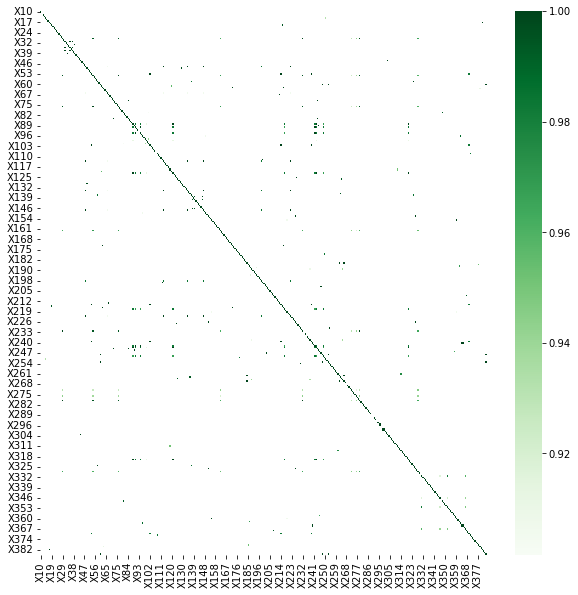

In [120]:
import seaborn as sn
corr_plot = corr[corr>=.9]
plt.figure(figsize=(10, 10))
sn.heatmap(corr_plot, cmap="Greens")

In [121]:
corr = corr.unstack().sort_values().drop_duplicates()
corr = pd.DataFrame(corr)
corr

,,0
X52,X120,-1.000000
X54,X136,-1.000000
X130,X128,-1.000000
X186,X194,-1.000000
X232,X136,-0.994274
...,...,...
X136,X263,0.994274
X19,X215,0.994691
X129,X49,0.997790
X385,X60,1.000000


In [122]:
correlation = True
while correlation == True:
    to_drop = []
    corr = X[X.select_dtypes(include = ['int64', 'float64']).columns].corr()
    corr = pd.DataFrame(corr.unstack().sort_values().drop_duplicates())
    for i, n  in enumerate(corr.index):
        if abs(corr[0][i]) > 0.9:
            to_drop.append(n[0])
    X = X.drop(to_drop, axis=1)
    print(to_drop)
    if to_drop == []:
        correlation = False
X

['X52', 'X54', 'X130', 'X186', 'X232', 'X76', 'X228', 'X362', 'X136', 'X328', 'X66', 'X162', 'X136', 'X337', 'X61', 'X276', 'X134', 'X136', 'X272', 'X179', 'X136', 'X111', 'X179', 'X186', 'X251', 'X80', 'X66', 'X48', 'X155', 'X360', 'X150', 'X238', 'X379', 'X99', 'X194', 'X272', 'X331', 'X276', 'X352', 'X76', 'X232', 'X272', 'X251', 'X265', 'X276', 'X328', 'X346', 'X265', 'X101', 'X276', 'X272', 'X328', 'X367', 'X118', 'X185', 'X328', 'X61', 'X331', 'X54', 'X162', 'X358', 'X279', 'X217', 'X249', 'X249', 'X76', 'X362', 'X261', 'X331', 'X53', 'X108', 'X243', 'X198', 'X198', 'X242', 'X217', 'X250', 'X137', 'X363', 'X80', 'X264', 'X138', 'X368', 'X76', 'X136', 'X19', 'X129', 'X385']
['X204', 'X29', 'X158', 'X119', 'X370', 'X94', 'X146', 'X383']
['X156', 'X122', 'X382']
['X88', 'X380']
['X320', 'X378']
['X377']
['X376']
['X375']
['X374']
['X373']
['X372']
['X371']
['X369']
['X366']
['X365']
['X364']
['X361']
['X359']
['X357']
['X356']
['X355']
['X354']
['X353']
['X351']
['X350']
['X349']
['

,X0,X1,X2,X3,X4,X5,X6,X8,X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347
0,k,v,at,a,d,u,j,o,0,0,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q,0,0,0,0,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,h,0,0,0,0,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,e,0,0,0,0,0,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,u,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

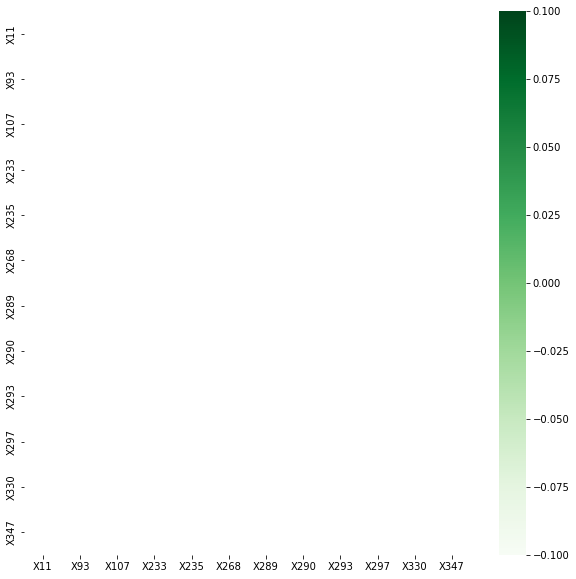

In [128]:
corr = X[X.select_dtypes(include = ['int64', 'float64']).columns].corr()
corr_plot_2 = corr[corr>=.9]
plt.figure(figsize=(10, 10))
sn.heatmap(corr_plot_2, cmap="Greens")

In [129]:
transformer_numerical = Pipeline(steps = [('scaler', StandardScaler()),
                                          ('pca', None)])
transformer_categorical = Pipeline(steps = [('encoder', OneHotEncoder(drop='first',
                                                                     handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers = [('numerical', transformer_numerical, cols_num),
                                               ('categorical', transformer_categorical, cols_cat)])

In [130]:
pipe = Pipeline(steps = [('preprocessor', preprocessor), ('model', None)])

In [ ]:
param_grid = [
    {
        'preprocessor__numerical__pca' : [PCA(n_components=0.95), None],
        'model__n_estimators' : sp_randint(200, 500),
        'model__max_depth' : np.arange(1, 11, 1),
        'model__min_samples_split' : np.arange(2, 10, 1),
        'model__min_samples_leaf' : sp_randint(1, 12),
        'model__ccp_alpha' : [0, 0.0001, 0.001, 0.01, 0.1, 5, 10, 50, 100, 500, 1000],
        'model': [RandomForestRegressor()]
    },
    {
        'preprocessor__numerical__scaler' : [StandardScaler(), MinMaxScaler()],
        'preprocessor__numerical__pca' : [PCA(n_components=0.95), None],
        'model__learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive'],
        'model__alpha' : [0, 0.0001, 0.001, 0.01, 0.1, 5, 10, 50, 100, 500, 1000],
        'model': [SGDRegressor()]
    },
    {
        'preprocessor__numerical__pca' : [PCA(n_components=0.95), None],
        'model__n_estimators' : sp_randint(10, 100),
        'model__max_depth': np.arange(2, 9),
        'model__learning_rate': np.arange(0.01, 0.3, 0.01),
        'model__colsample_bytree': np.arange(0.1, 1, 0.1),
        'model__gamma': np.arange(0, 20, 2),
        'model': [XGBRegressor()]
    }

]
grid = RandomizedSearchCV(pipe, param_grid, n_iter=1000, scoring='r2')
grid.fit(X_train, y_train)

D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarn

D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: F

D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarn

D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
D:\anaconda\envs\merc\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning

In [ ]:
pd.set_option('display.max_colwidth', 1000)
pd.DataFrame(grid.cv_results_).sort_values(by = 'rank_test_score')[['params',
                                                                    'mean_fit_time',
                                                                    'mean_test_score']]

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_estimator_.fit(X_train, y_train)
r2_score(y_test, grid.best_estimator_.predict(X_test))
#0.5901821334115114  n_iter=1000
#0.5963850181058674

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(563,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
X = pd.get_dummies(X)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
_, accuracy = model.evaluate(X, y)

In [ ]:
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
test = pd.read_csv('test.csv')
test

In [ ]:
X = test.drop(['ID'], axis=1)

In [ ]:
results = pd.DataFrame({'ID' : test['ID'], 'y' : grid.best_estimator_.predict(X)})
results

In [ ]:
#results.to_csv('submission.csv', index=False)